In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "hr.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check the data types of columns
data.info()

# Check summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# Handling missing values
data = data.dropna()

# Encoding categorical variables
data_encoded = pd.get_dummies(data)

# Splitting data into features and target
X = data_encoded.drop('Attrition_Yes', axis=1)
y = data_encoded['Attrition_Yes']

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf.predict(X_test)

# Evaluating the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [10]:
!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb.predict(X_test)

# Evaluating the model
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [11]:
# Model comparison
models = {
    'Logistic Regression': logreg,
    'Random Forest Classifier': rf,
    'XGBoost Classifier': xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294

Random Forest Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

XGBoost Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macr

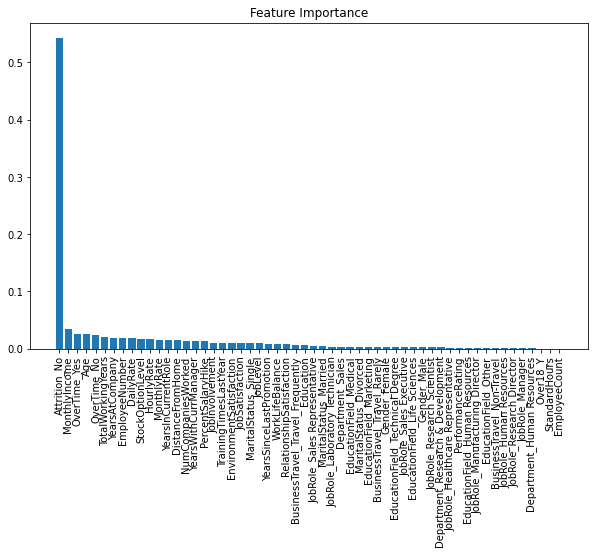

In [9]:
# Feature importance
importance = rf.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()
